# Analiza regresji
***

## Wstęp

Algorytmy regresyjne należą do grupy *uczenia nadzorowanego* (Supervised Learning), inaczej mówiąc, są to algorytmy mające określoną zmienną celu (target) oraz zdefiniowane zmienne wejściowe. W odróżnieniu od klasyfikacji, w regresji zmienna celu jest liczbą rzeczywistą. Analiza regresji jest jedną z metod analizy statystycznej pozwalających opisać zależność między zmienną objaśnianą $y \in \mathbb{R}$ (zmienna celu, zmienna zależna) oraz zmienną, bądź kilkoma, zmiennymi objaśniającymi (niezależnymi) $x \in \mathbb{R}^d$.

Załóżmy, że chcemy wystawić na sprzedaż dom, ale nie znamy jego wartości. Powinniśmy zatem przyjrzeć się innym domom w okolicy, sprzedanym w niedalekiej przeszłości i na podstawie cen sprzedaży oraz innych czynników, takich jak ilość sypialni czy powierzchnia użytkowa, określić wartość domu, który chcemy sprzedać. 

W badanym przypadku, zmienną zależną będzie cena domu, natomiast zmiennymi niezależnymi będą ilość sypialni, ilość łazienek, powierzchnia w m2, rok budowy itd. Znajdując zależność między tymi zmiennymi, będziemy w stanie określić jakie czynniki mają faktyczny wpływ na wartość domu oraz który czynnik jest najbardziej istotny, a także przewidzieć cenę za jaką sprzedamy nasz dom. 

***
## Modele regresyjne

Zostanie przedstawionych 6 następujących algorytmów regresyjnych:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Polynomial Regression
- Decision Tree
- Random Forest

Skrótowo zostaną także przedstawione XGBoost, LightGBM oraz Sieci Neuronowe.

## Linear Regression

Załóżmy, że mamy wektor $X^T = (1, x_1, x_2,\dots, x_p)$ i chcemy przewidzieć wartość zmiennej $y$. Model regresji liniowej przedstawia się następująco: 

$$f(X) = \sum_{j=0}^p x_j \beta_j + \epsilon_j,$$

gdzie $\beta_j$ nazywane są współczynnikami, a $\epsilon_j$ jest składnikiem losowym. 

Model regresji liniowej zakłada, że warunkowa wartość oczekiwana $E(Y|X)$ jest funkcją liniową. 

Najpopularniejszą metodą estymacji liniowej zależności jest <b>metoda najmniejszych kwadratów</b>, która wyznacza współczynniki $\beta$ funkcji

$$\hat{f}(X) = \sum_{j=0}^p x_j \beta_j$$
tak, aby zminimalizować błąd kwadratowy

    $$RSS(\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 = \big(X \beta - y\big)^T \big(X \beta - y\big).$$


Matematycznie problem ten można opisać wzorem:


$$ 	\frac{\partial RSS}{\partial \hat{\beta}} = 0$$


Po zróżniczkowaniu i po przekształceniach otrzymujemy wzór na współczynniki $\hat{\beta}$:

$$ \hat{\beta} = (X^TX)^{-1} X^T y$$

Poniższa ramka danych zawiera informację o cenie sprzedaży domów oraz ich powierzchni.

In [1]:
# Załadowanie bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Parametry do wizualizacji
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
# Stworzenie ramki danych
data = pd.DataFrame(([76, 350], [80, 370], [150, 540], [200, 600], [50, 300], [300, 800], [120, 490], [130, 500],
                    [250, 700], [120, 700]), 
                   columns=['M2', 'Cena'])

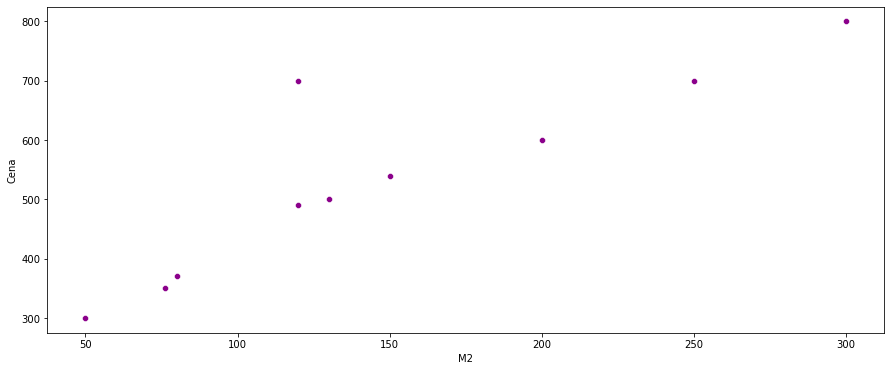

In [4]:
# Wizualizacja danych
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
plt.show()

Możemy założyć, że istnieje liniowa zależność pomiędzy ceną domu, a powierzchnią w m2. Czyli, szukamy funkcji $\hat{f}$ takiej, że: 

$$cena \approx \hat{ \beta}_0 + \hat{\beta}_1 \cdot m2 \$$ 




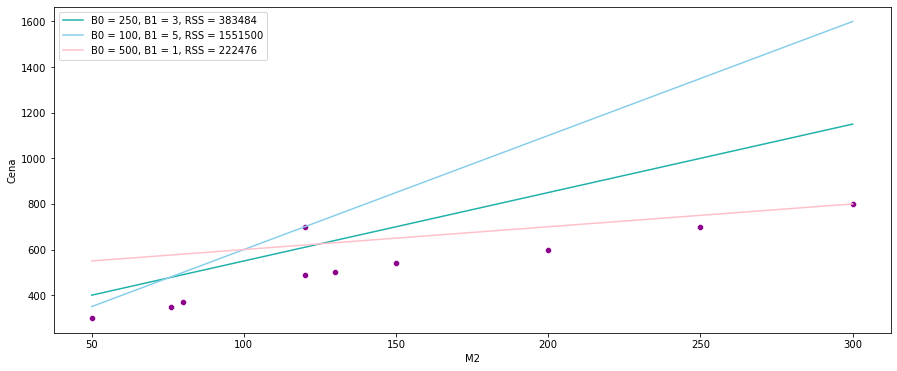

In [5]:
y=data['Cena']
sns.scatterplot(x=data['M2'], y=y, color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = 3 * data['M2'] + 250, color = 'lightseagreen', label = "B0 = 250, B1 = 3, RSS = " + str(np.sum(np.square(3 * data['M2'] + 250 - y))))
sns.lineplot(data=data, x=data['M2'], y = 5 * data['M2'] + 100, color = 'skyblue', label = "B0 = 100, B1 = 5, RSS = " + str(np.sum(np.square(5 * data['M2'] + 100 - y))))
sns.lineplot(data=data, x=data['M2'], y = 1 * data['M2'] + 500, color = 'pink', label = "B0 = 500, B1 = 1, RSS = " + str(np.sum(np.square(1 * data['M2'] + 500 - y))))
plt.legend()
plt.show()

Widzimy, że najmniejszy błąd kwadratowy daje nam różowa linia. 
Aby znaleźć najlepsze z możliwych rozwiązań, wykorzystamy funkcję LinearRegression z biblioteki scikit-learn do znalezienia wartości współczynników $ \hat{ \beta}_0, \hat{ \beta}_1$ metodą najmniejszych kwadratów.

In [6]:
X = data.loc[:, 'M2']
X = X.values.reshape(-1, 1)
y = data.loc[:, 'Cena']
reg = LinearRegression(positive=False,        # positive = True może mieć sens dla np. cen
                       fit_intercept=True)    # jeśli False to brak wyrazu wolnego
reg.fit(X,y)

LinearRegression()

In [7]:
# Współczynnik
reg.coef_

array([1.83141395])

In [8]:
#Wyraz wolny
reg.intercept_

264.68330134357

Znaleziona funkcja przedstawia się następująco:

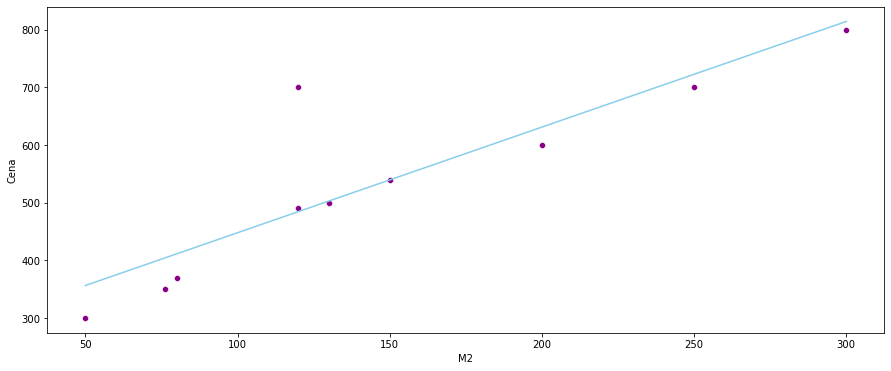

In [9]:
sns.scatterplot(x=data['M2'], y=data['Cena'], color='darkmagenta')
sns.lineplot(data=data, x=data['M2'], y = reg.coef_ * data['M2'] + reg.intercept_, color = 'skyblue')
plt.show()

Błąd kwadratowy w tym przypadku wynosi: 

In [10]:
y_pred = reg.predict(X)
np.sum(np.square(y_pred - y))

55928.854766474724

***

## Ridge Regression

*Overtfitting* to nadmierne dopasowanie modelu do danych, przez co na zbiorze treningowym błąd kwadratowy będzie bliski zeru, natomiast na zbiorze testowym będzie bardzo duży. W regresji liniowej zjawisko to, wystąpić może w przypadku, gdy mamy mniej obserwacji niż predyktorów. 

![title](Bias_and_variance_contributing_to_total_error.svg.png) 
*Źródło: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff*

W celu rozwiązania problemu przeuczenia modelu, należy znaleźć kompromis między wariancją a przeciążeniem. Dokonać tego można dodając regularyzację do modelu.

**Norma $Lp$**

Niech $x = (x_1, x_2, ..., x_n) \in \mathbf{X}$. Funkcje postaci

$$||x||_p = (|x_1|^p + |x_2|^p + ... |x_n|^p ) ^{\frac{1}{p}} $$

są normami dla $ 1 \leq p < \infty $. Normę $||x||_2 $ nazywa się *normą euklidesową*. 





<b> Ridge Regression</b> wykorzystuje normę euklidesową $L2$, aby "ukarać" model za wielkość współczynników. Wtedy zamiast minimalizacji błędu resztowych sum kwadratów, minimalizowana jest funkcja: 

$$RSS_{Ridge} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} \beta_j^2, $$

gdzie $\alpha$ jest hiperparametrem, nazywanym współczynnikiem kary. Przyjmuje wartości $\alpha \geq 0$. Im wyższa jego wartość, tym model jest bardziej "karany".
***

Dla celów edukacyjnych podzielimy zbiór tak, aby w zbiorze treningowym były tylko 2 obserwacje. Jest to zabieg celowy, gdyż chcemy pokazać przykład overtfittingu. 

In [11]:
data_train, data_test = train_test_split(data, test_size = 0.8, random_state = 10)
X_train = data_train.loc[:, 'M2']
y_train = data_train.loc[:, 'Cena']
X_test = data_test.loc[:, 'M2']
y_test = data_test.loc[:, 'Cena']

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [12]:
X = data.loc[:, 'M2']
y = data.loc[:, 'Cena']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 10)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

Często $\alpha$ wybiera się z przedziału $[0,1]$. W naszym przypadku wartości te są zbyt małe, więc musieliśmy ją znacznie zwiększyć. Ponieważ $\alpha$ jest hiperparametrem, w celu znalezienia najlepszej wartości można wykorzystać *walidację krzyżową*. 

In [13]:
ridge1 = Ridge(alpha = 0)       #warto zwrócić uwagę, że alpha = 0 daje nam zwykłą regresję liniową
ridge1.fit(X_train, y_train)

Ridge(alpha=0)

In [14]:
ridge2 = Ridge(alpha = 200)
ridge2.fit(X_train, y_train)

Ridge(alpha=200)

In [15]:
ridge3 = Ridge(alpha = 1000)
ridge3.fit(X_train, y_train)

Ridge(alpha=1000)

In [16]:
ridge4 = Ridge(alpha = 5000)
ridge4.fit(X_train, y_train)

Ridge(alpha=5000)

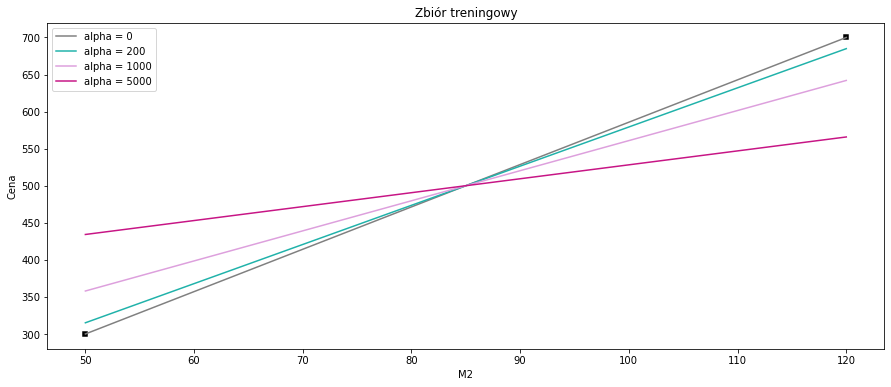

In [17]:
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data_train['M2'], y = ridge1.coef_ * data_train['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data_train['M2'], y = ridge2.coef_ * data_train['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data_train['M2'], y = ridge3.coef_ * data_train['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data_train['M2'], y = ridge4.coef_ * data_train['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór treningowy")
plt.show()

Możemy zauważyć, że na zbiorze treningowym regresja liniowa dopasowuje się idealnie do obserwacji, gdzie regresja grzbietowa wraz ze wzrostem parametru $\alpha$ wydaje się mieć coraz gorsze dopasowanie. Zobaczmy jak to wygląda na zbiorze testowym. 

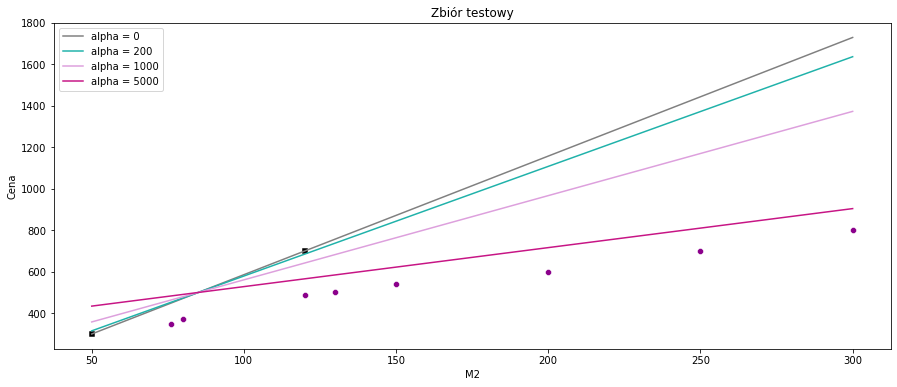

In [18]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='black', marker = 's')
sns.lineplot(data=data, x=data['M2'], y = ridge1.coef_ * data['M2'] + ridge1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = ridge2.coef_ * data['M2'] + ridge2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = ridge3.coef_ * data['M2'] + ridge3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = ridge4.coef_ * data['M2'] + ridge4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

W przypadku regresji liniowej widoczny jest **overfittting**. Linia przechodzi dokładnie przez dwie obserwacje ze zbioru treningowego, zatem błąd kwadratowy będzie równy zero, natomiast na zbiorze testowym błąd ten będzie bardzo duży. Aby zapobiec takiej sytuacji, została wykorzystana Ridge Regression.

In [19]:
wyniki = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(ridge1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(ridge2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(ridge4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, ridge1.predict(X_test)),
                                   metrics.r2_score(y_test, ridge2.predict(X_test)),
                                   metrics.r2_score(y_test, ridge3.predict(X_test)),
                                   metrics.r2_score(y_test, ridge4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, ridge1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, ridge4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849875,403.392857
alpha = 200,1615208.000000,-8.742643,369.646226
alpha = 1000,814095.000000,-3.910474,273.786232
alpha = 5000,88315.000000,0.467297,103.296980


Widzimy, że im większy współczynnik kary, tym model jest bardziej dopasowany do pozostałych obserwacji. 

***

## Lasso Regression

**Lasso Regression** jest kolejną metodą służącą do redukcji overfittingu, ale tym razem wykorzystującą do regularyzacji normę $L1$. 

Funkcja celu modelu Lasso Regression wygląda następująco: 

$$RSS_{Lasso} (\beta) = \sum_{i=1}^N \bigg(y_i - \sum_{j=0}^p x_{ij} \beta_j\bigg)^2 + \alpha \sum_{j=1}^{p} |\beta_j|, $$

In [20]:
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X_train, y_train)

Lasso(alpha=0.001)

In [21]:
lasso2 = Lasso(alpha = 200)
lasso2.fit(X_train, y_train)

Lasso(alpha=200)

In [22]:
lasso3 = Lasso(alpha = 1000)
lasso3.fit(X_train, y_train)

Lasso(alpha=1000)

In [23]:
lasso4 = Lasso(alpha = 5000)
lasso4.fit(X_train, y_train)

Lasso(alpha=5000)

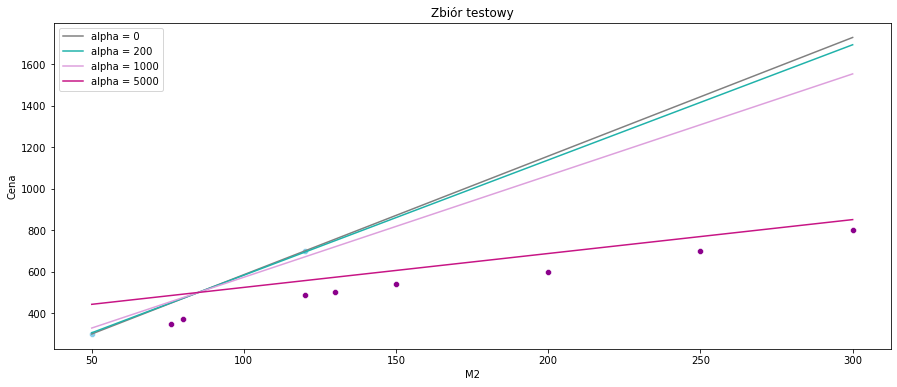

In [24]:
sns.scatterplot(x=data_test['M2'], y=data_test['Cena'], color='darkmagenta')
sns.scatterplot(x=data_train['M2'], y=data_train['Cena'], color='skyblue')
sns.lineplot(data=data, x=data['M2'], y = lasso1.coef_ * data['M2'] + lasso1.intercept_, color = 'gray', label = 'alpha = 0')
sns.lineplot(data=data, x=data['M2'], y = lasso2.coef_ * data['M2'] + lasso2.intercept_, color = 'lightseagreen', label = 'alpha = 200')
sns.lineplot(data=data, x=data['M2'], y = lasso3.coef_ * data['M2'] + lasso3.intercept_, color = 'plum', label = 'alpha = 1000')
sns.lineplot(data=data, x=data['M2'], y = lasso4.coef_ * data['M2'] + lasso4.intercept_, color = 'mediumvioletred', label = 'alpha = 5000')
plt.title("Zbiór testowy")
plt.show()

Tutaj również możemy wyciągnąć wniosek, że im większy współczynnik kary, tym dopasowanie modelu jest lepsze. 

In [25]:
wyniki2 = pd.DataFrame(data = {'RSS':[round(np.sum(np.square(lasso1.predict(X_test) - y_test)),0), 
                                     round(np.sum(np.square(lasso2.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso3.predict(X_test) - y_test)),0),
                                     round(np.sum(np.square(lasso4.predict(X_test) - y_test)),0)
                                    ],
                             'R2': [metrics.r2_score(y_test, lasso1.predict(X_test)),
                                   metrics.r2_score(y_test, lasso2.predict(X_test)),
                                   metrics.r2_score(y_test, lasso3.predict(X_test)),
                                   metrics.r2_score(y_test, lasso4.predict(X_test))],
                             'MAE': [metrics.mean_absolute_error(y_test, lasso1.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso2.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso3.predict(X_test)),
                                    metrics.mean_absolute_error(y_test, lasso4.predict(X_test))]}, 
                      index=['alpha = 0', 'alpha = 200', 'alpha = 1000', 'alpha = 5000']).style.background_gradient(cmap='Blues')
wyniki2

,RSS,R2,MAE
alpha = 0,1964561.000000,-10.849871,403.392793
alpha = 200,1828182.000000,-10.027261,390.617347
alpha = 1000,1332914.000000,-7.039895,339.515306
alpha = 5000,62549.000000,0.622717,84.005102


Używanie normy $L1$ może także spowodować, że w przypadku modelu o kilku zmiennych objaśniających, współczynniki dla niektórych z nich zostaną wyzerowane.

**Interpretacja geometryczna**


![title](ridge_lasso.png)


Źródło: *The Elements of Statistical Learning* Trevor Hastie, Robert Tibshirani, Jerome Friedman, Second Edition. 


Czerwone elipsy odpowiadają za błąd kwadratowy, natomiast niebieskie kolory przedstawiają kulę w metrykach $L1$ i $L2$ odpowiednio. W związku z tym, że kula w metryce $L1$ ma kwadratowy kształt, to kiedy suma resztowa kwadratów znajdzie się w jednym z rogów, współczynnik jest zerowany. W Ridge Regression współczynniki te zbliżają się do zera, ale nigdy nie osiągają wartości równej 0. 

Z tego też względu **Lasso Regression** jest często wykorzystywane również do wyboru zmiennych modelu. 

***

## Polynomial Regression

Weźmy teraz nowy, nieco bardziej abstrakcyjny zbiór danych, zdefiniowany jako argumenty i wartości pewnej funkcji, przy czym do wartości dodajmy nieco szumu losowego.

In [26]:
N = 125
np.random.seed(23)
x = np.random.rand(N,1) * 2 - 1
noise = np.random.normal(0,0.2,size=(N,1))
y = x ** 2 + 0.5 * np.sin(x) + noise

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 11, test_size = 0.2)

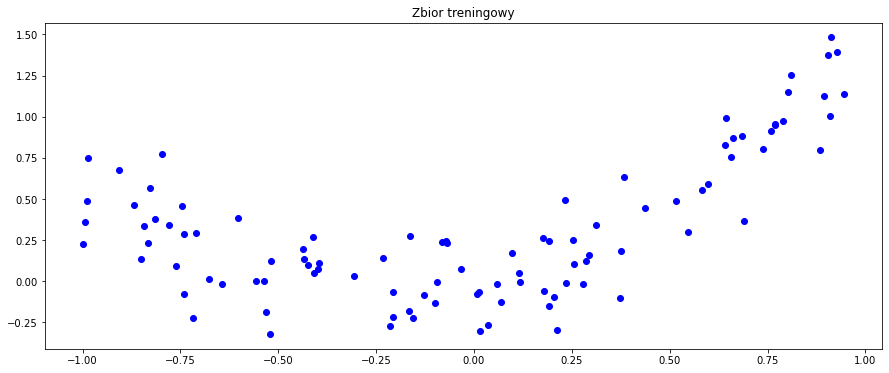

In [27]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.title('Zbior treningowy') 
plt.show()

Spróbujmy dopasować do tych danych model regresji liniowej.

In [28]:
reg2 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg2.fit(x_train,y_train)

LinearRegression()

In [29]:
print("Coefficient: ", reg2.coef_)
print("Intercept: ", reg2.intercept_)

Coefficient:  [[0.38355249]]
Intercept:  [0.32220545]


Sprawdźmy dopasowanie modelu do danych treningowych.

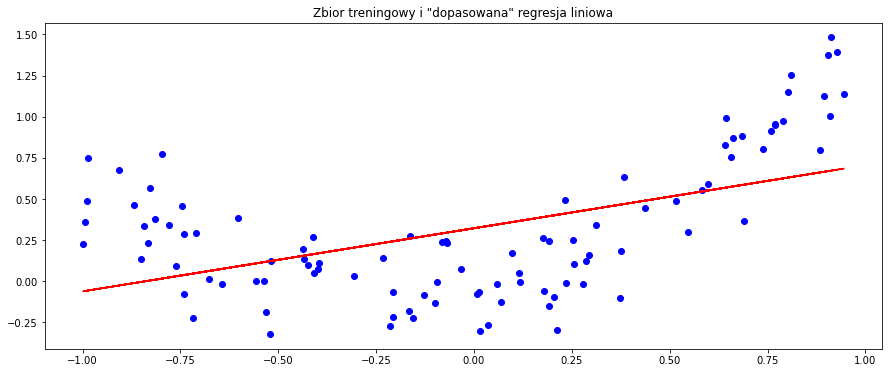

In [30]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(x_train, x_train * reg2.coef_ + reg2.intercept_, c='r')
plt.title('Zbior treningowy i "dopasowana" regresja liniowa') 
plt.show()

In [31]:
preds3 = reg2.predict(x_valid)

wyniki3 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds3 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds3)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds3)]}, 
                      index=['lin_reg']).style.background_gradient(cmap='Blues')
wyniki3

,RSS,R2,MAE
lin_reg,2.193040,0.441041,0.246324


Jak widzimy, model regresji liniowej nie dał dobrego dopasowania do nowego zbioru danych. Stało się tak dlatego, że relacja pomiędzy zmienną objaśniającą a zmienną objaśnianą po prostu nie jest liniowa, a co za tym idzie, modele liniowe nie będą dawać nam zadowalającej skuteczności. W takim wypadku, siłą rzeczy, powinniśmy posłużyć się modelami nieliniowymi. Pierwszym z nich jest regresja wielomianowa.

Najprostszą formą regresji wielomianowej jest regresja kwadratowa, której równanie jest dane jako

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon,$$

gdzie oczywiście zakładamy, że mamy jedną zmienną objaśniającą i jedną zmienną objaśnianą. W ogólności, możemy modelować oczekiwaną wartość $y$ wielomianem n-tego stopnia, uzyskując równanie ogólne postaci

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon.$$

Można zauważyć, że z punktu widzenia estymacji ten model jest liniowy, gdyż funkcja regresji jest liniowa względem nieznanych parametrów $\beta_0,\beta_1,...,\beta_n$. Zatem, stosując metodę najmniejszych kwadratów, taki model może być traktowany jak model regresji liniowej wielu zmiennych, przy założeniu, że $x,x^2,...x^n$ są różnymi, niezależnymi zmiennymi w takim modelu.

Podobnie jak wcześniej, współczynniki $\beta$ są dane wzorem

$$ \hat{\beta} = (X^TX)^{-1} X^T y.$$

Na początek zamodelujemy dane regresją kwadratową.

In [32]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_valid_poly = poly.transform(x_valid)

Funkcja PolynomialFeatures wyznacza wielomiany złożone z cech numerycznych zadanej ramki danych. W naszym wypadku, jeśli mamy do dyspozycji jedną cechę $x$ oraz wyznaczamy cechy wielomianowe drugiego stopnia, powstanie nam nowa cecha $x^2$ oraz dodatkowa cecha, która dla każdego rekordu przyjmuje wartość $1$. Natomiast, jeśli mielibyśmy dwie cechy $[x_1,x_2]$, to lista nowych cech wyglądałaby następująco: $[1,x_1,x_2,x_1^2,x_1 x_2,x_2^2]$, gdzie wszystkie cechy trafiłyby do modelu.

In [33]:
reg3 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg3.fit(x_train_poly,y_train)

LinearRegression()

In [34]:
print("Coefficient: ", reg3.coef_)
print("Intercept: ", reg3.intercept_)

Coefficient:  [[0.         0.42997276 1.02119995]]
Intercept:  [-0.01564705]


In [35]:
y_pred_reg3 = reg3.predict(x_valid_poly)

In [36]:
df_plot_squarereg = pd.DataFrame(
    {'x': np.reshape(x_train, (100,)), 
    'prediction': x_train_poly[:,1] * reg3.coef_[:,1] + x_train_poly[:,2] * reg3.coef_[:,2] + reg3.intercept_
    }).sort_values(by = 'x')

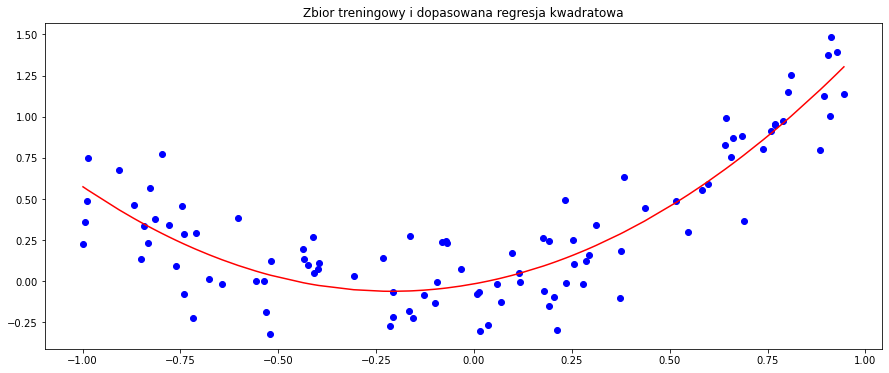

In [37]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(df_plot_squarereg['x'],  df_plot_squarereg['prediction'], c='r')
plt.title('Zbior treningowy i dopasowana regresja kwadratowa') 
plt.show()

In [38]:
preds4 = reg3.predict(x_valid_poly)

wyniki4 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds3 - y_valid)),
                                      np.sum(np.square(preds4 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds3),
                                    metrics.r2_score(y_valid, preds4)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds3),
                                    metrics.mean_absolute_error(y_valid, preds4)]}, 
                      index=['lin_reg', 'square_reg']).style.background_gradient(cmap='Blues')
wyniki4

,RSS,R2,MAE
lin_reg,2.193040,0.441041,0.246324
square_reg,0.710297,0.818960,0.131138


Zgodnie z oczekiwaniami, model regresji kwadratowej dał o wiele lepsze dopasowanie. Teraz sprawdźmy jeszcze co stanie się, gdy znacznie zwiększymy stopień wielomianu dla powyższych danych.

In [39]:
poly100 = PolynomialFeatures(degree = 100)
x_train_poly100 = poly100.fit_transform(x_train)
x_valid_poly100 = poly100.transform(x_valid)

In [40]:
reg4 = LinearRegression(positive=False,        
                       fit_intercept=True)    
reg4.fit(x_train_poly100,y_train)

LinearRegression()

In [41]:
print("Coefficient: ", reg4.coef_)
print("Intercept: ", reg4.intercept_)

Coefficient:  [[ 4.13091207e+11 -6.04024245e+00  5.20884880e+01  1.15884980e+03
  -6.63045817e+03 -7.66101817e+04  3.59531814e+05  2.57035742e+06
  -1.07980883e+07 -5.04026568e+07  2.01696884e+08  6.25332617e+08
  -2.49500731e+09 -5.14011996e+09  2.12490891e+10  2.85487855e+10
  -1.27457531e+11 -1.06000350e+11  5.42801872e+11  2.45354930e+11
  -1.62553399e+12 -2.57000026e+11  3.29177034e+12 -2.75358643e+11
  -4.02155197e+12  1.24789090e+12  1.74515957e+12 -1.24244649e+12
   2.09006102e+12 -5.59315548e+11 -2.16394074e+12  1.50602220e+12
  -1.59179913e+12  4.93497161e+11  1.58918555e+12 -1.31466112e+12
   1.97182680e+12 -1.09851749e+12 -5.08242929e+11  7.82166742e+11
  -2.03838327e+12  1.48897782e+12 -1.01277843e+12  4.46176279e+11
   1.00059706e+12 -9.60706650e+11  1.77473002e+12 -1.41229597e+12
   9.12770301e+11 -6.01751714e+11 -7.90055056e+11  8.33835164e+11
  -1.50822996e+12  1.37544002e+12 -1.19795906e+12  9.76804489e+11
   3.03961710e+10 -1.87730314e+11  1.10400441e+12 -1.04394989e

In [42]:
formula = 0
for i in range(1,101):
    formula = formula + x_train_poly100[:,i] * reg4.coef_[:,i]

In [43]:
df_plot_squarereg2 = pd.DataFrame(
    {'x': np.reshape(x_train, (100,)), 
    'prediction': formula + reg3.intercept_
    }).sort_values(by = 'x')

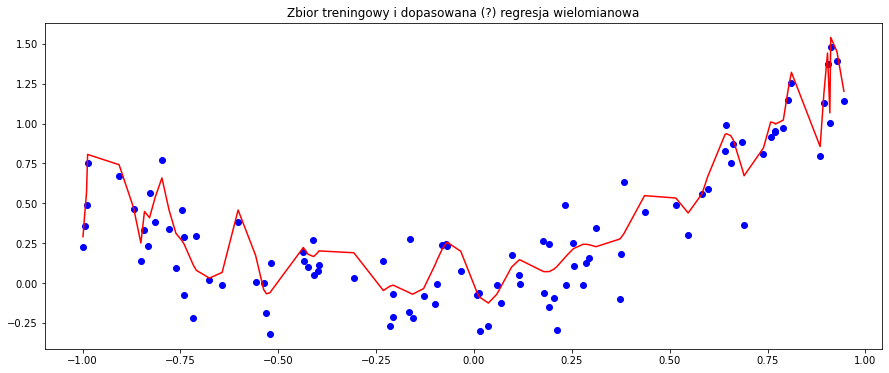

In [44]:
plt.scatter(x_train, y_train, c='b', marker='o')
plt.plot(df_plot_squarereg2['x'],  df_plot_squarereg2['prediction'], c='r')
plt.title('Zbior treningowy i dopasowana (?) regresja wielomianowa') 
plt.show()

Sprawdźmy wartości metryk na zbiorze walidacyjnym.

In [45]:
preds5 = reg4.predict(x_valid_poly100)

wyniki5 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(preds5 - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds5)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds5)]}, 
                      index=['square_reg', 'poly_reg']).style.background_gradient(cmap='Blues')
wyniki5

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
poly_reg,9248466362.445641,-2357237686.621840,3847.051869


Jak można było się spodziewać, model jest teraz mocno przeuczony. Stosując model regresji wielomianowej należy pamiętać o ryzyku przeuczenia modelu, które wzrasta wraz ze wzrostem stopnia wielomianu. Oczywiście, zapobiec temu problemowi może regularyzacja, którą można stosować analogicznie jak w regresji liniowej.
***

## Decision Trees

Drzewa decyzyjne to algorytm modelujący dane nieliniowo, nadający się zarówno do klasyfikacji, jak i regresji. Przyjmują one dowolne typy danych, numeryczne i kategoryczne, bez założeń dotyczących rozkładu i bez potrzeby ich wstępnego przetwarzania. Algorytm ten jest względnie łatwy w użyciu, a jego wyniki są w miarę proste w interpretacji. Po dopasowaniu modelu, przewidywanie wyników jest szybkim procesem. Jednak drzewa decyzyjne mają też swoje wady, mają one tendencję do przeuczania (zwłaszcza, gdy nie są przycinane).

**Konstrukcja**

Drzewa decyzyjnie można podsumować jako serię pytań/warunków dla ustalonego rekordu w danych treningowych, które kończą się zwróceniem przez drzewo informacji o oczekiwanej wartości (klasie) zmiennej objaśnianej dla owego rekordu. Składają się one z węzłów, gałęzi i liści. Konstrukcję zaczyna się od korzenia, czyli pierwszego węzła. Następnie tworzymy gałęzie odpowiadające różnym odpowiedziom na to pytanie, i powtarzamy te czynności do momentu, gdy drzewo zwraca nam oczekiwaną wartość zmiennej objaśnianej. Jeśli w liściu znalazła się więcej niż jedna wartość, wyznaczamy średnią z owych wartości jako wskazaną przez drzewo. Drzewa stosowane w regresji nazywa się czasem drzewami regresyjnymi.

**Przycinanie liści**

Żeby zapobiec zbyt dużemu rozrostowi drzewa decyzyjnego, który może doprowadzić do małego poziomu generalizacji oraz spowolnienia działania algorytmu, stosuje się tak zwane przycianie drzewa (ang pruning). Polega ono na usuwaniu zbędnych elementów z drzewa po jego utworzeniu. Wyróżnia się dwa podstawowe rodzaje przycinania:

1) przycinanie wsteczne, polegające na wygenerowaniu drzewa, które jest bardzo dobrze dopasowane do zbioru treningowego, a następnie usuwanie od dołu najmniej efektywnych węzłów,

2) przycinanie w przód, polegające na wstrzymaniu dalszej rozbudowy danej gałęzi jeśli na węźle znajduje się ilość próbek zaklasyfikowanych do danej klasy, przekracza wyznaczony próg.

**Miary wyboru podziału drzewa regresyjnego**

W drzewach decyzyjnych dla klasyfikacji, drzewo musi zadawać właściwe pytania we właściwym momencie, aby dokładnie klasyfikować dane. W tym celu korzysta się z miar entropii, przyrostu informacji lub indeksu Giniego. Jednak ponieważ teraz przewidujemy wartości ciągłych zmiennych, potrzebujemy innej miary. Takiej, która określa odchylenie predykcji od rzeczywistej wartości. Naturalnym wyborem zdaje się być błąd średniokwadratowy, dany dla przypomnienia wzorem 

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y})^2,$$

gdzie $Y$ to wartości znajdujące się w węźle drzewa, który chcemy dzielić, zaś $\hat{Y}$ jest ich średnią. Wybierając podział należy ten błąd zminimalizować. Alternatywnie korzysta się z następujących kryteriów: MSE Friedmana, MAE oraz Poisson deviance.

Przejdźmy przez przykładowy, ręczny wybór podziału.

In [46]:
df_example = pd.DataFrame({'X': list(range(1,15)), 'Y': [1,1.2,1.4,1.1,1,5.5,6.1,6.7,6.4,6,6,3,3.2,3.1]})
df_example

,X,Y
0,1,1.0
1,2,1.2
2,3,1.4
3,4,1.1
4,5,1.0
5,6,5.5
6,7,6.1
7,8,6.7
8,9,6.4
9,10,6.0


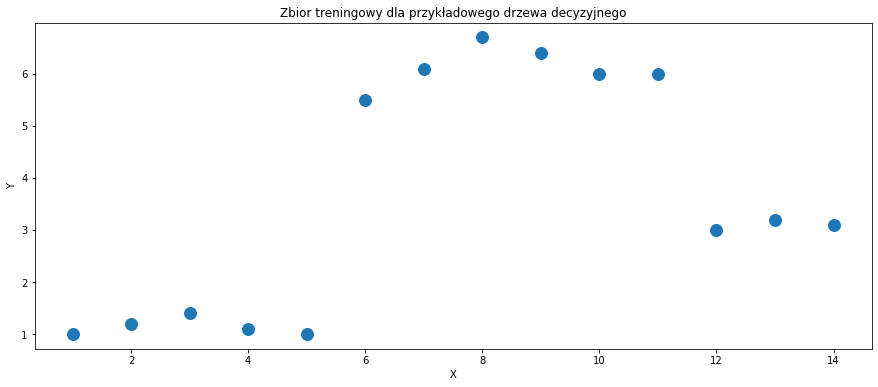

In [47]:
sns.scatterplot(x = df_example['X'], y = df_example['Y'], s = 200)
plt.title('Zbior treningowy dla przykładowego drzewa decyzyjnego')
plt.show()

Początkowa wartość $MSE$ wynosi

In [48]:
print('MSE =', (np.sum((df_example['Y'] - np.mean(df_example['Y'])) ** 2))/ df_example.shape[0])

MSE = 4.989234693877552


Dopiero zaczynamy budować drzewo, zatem w aktualnym węźle znajdują się wszystkie wartości $X$. Dla takiego zbioru danych, wszystkie możliwe warunki mają postać "Czy $X$ jest większe/mniejsze niż $a$?", gdzie $a$ to może być dowolna liczba z przedziału $(0,14)$. Dla uproszczenia będziemy rozpatrywać liczby $1.5,2.5,...,13.5$. Należy podzielić zbiór na każdy z 13 możliwych sposobów, wyznaczyć średnie wartości w węzłach jako aktualne wartości predykcji dla danego $X$, wyznaczyć wszystkie wartości $MSE$ oraz wybrać podział, dla którego ten błąd jest najmniejszy.

In [49]:
cut_list = []
mse_list = []

for i in range(1,14):
    
    cut = i + 0.5
    cut_list.append(cut)
    
    values_below = df_example[df_example['X'] < cut]
    values_above = df_example[df_example['X'] > cut]
    
    pred_below = np.mean(values_below['Y'])
    pred_above = np.mean(values_above['Y'])
    
    sse = sum((values_below['Y'] - pred_below) ** 2) + sum((values_above['Y'] - pred_above) ** 2)
    mse = sse / len(df_example)
    mse_list.append(mse)

In [50]:
df_tree_cut = pd.DataFrame({'cut': cut_list, 'mse': mse_list})
df_tree_cut

,cut,mse
0,1.5,4.431429
1,2.5,3.868750
2,3.5,3.294416
3,4.5,2.453393
4,5.5,1.368635
5,6.5,2.488006
6,7.5,3.497347
7,8.5,4.349167
8,9.5,4.810540
9,10.5,4.982250


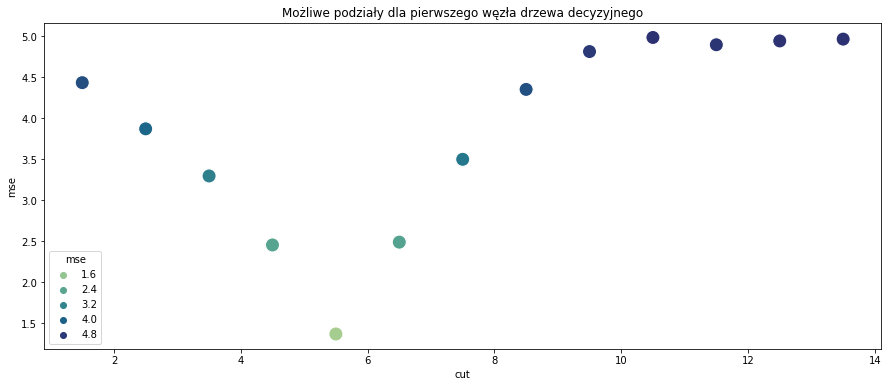

In [51]:
sns.scatterplot(x = df_tree_cut['cut'], y = df_tree_cut['mse'], s = 200, hue = df_tree_cut['mse'], palette = 'crest')
plt.title('Możliwe podziały dla pierwszego węzła drzewa decyzyjnego')
plt.show()

Stąd otrzymujemy, że pierwszy węzeł drzewa powinien zawierać warunek 

"Czy $X$ jest większe/mniejsze niż $5.5$?"

Stwórzmy teraz całe drzewo regresyjne na zbiorze danych, z którego korzystaliśmy przy okazji regresji wielomianowej. Tym razem już automatycznie. 

In [52]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
preds_dt = dt_reg.predict(x_valid)

In [53]:
wyniki6 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(np.reshape(preds_dt, (25,1)) - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds_dt)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds_dt)]}, 
                      index=['square_reg', 'dt_reg']).style.background_gradient(cmap='Blues')
wyniki6

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
dt_reg,1.442085,0.632443,0.197432


Wyniki modelu na zbiorze walidacyjnym nie są dobre. Zwizualizujmy stworzone drzewo żeby sprawdzić, co mogło pójść nie tak.

|--- feature_0 <= 0.56
|   |--- feature_0 <= -0.74
|   |   |--- feature_0 <= -0.79
|   |   |   |--- feature_0 <= -0.81
|   |   |   |   |--- feature_0 <= -0.86
|   |   |   |   |   |--- feature_0 <= -0.99
|   |   |   |   |   |   |--- feature_0 <= -1.00
|   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |--- feature_0 >  -1.00
|   |   |   |   |   |   |   |--- value: [0.36]
|   |   |   |   |   |--- feature_0 >  -0.99
|   |   |   |   |   |   |--- feature_0 <= -0.89
|   |   |   |   |   |   |   |--- feature_0 <= -0.99
|   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |--- feature_0 >  -0.99
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.95
|   |   |   |   |   |   |   |   |   |--- value: [0.75]
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.95
|   |   |   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |   |--- feature_0 >  -0.89
|   |   |   |   |   |   |   |--- value: [0.46]
|   |   |   |   |--- feature_0 >  -0.86
|  

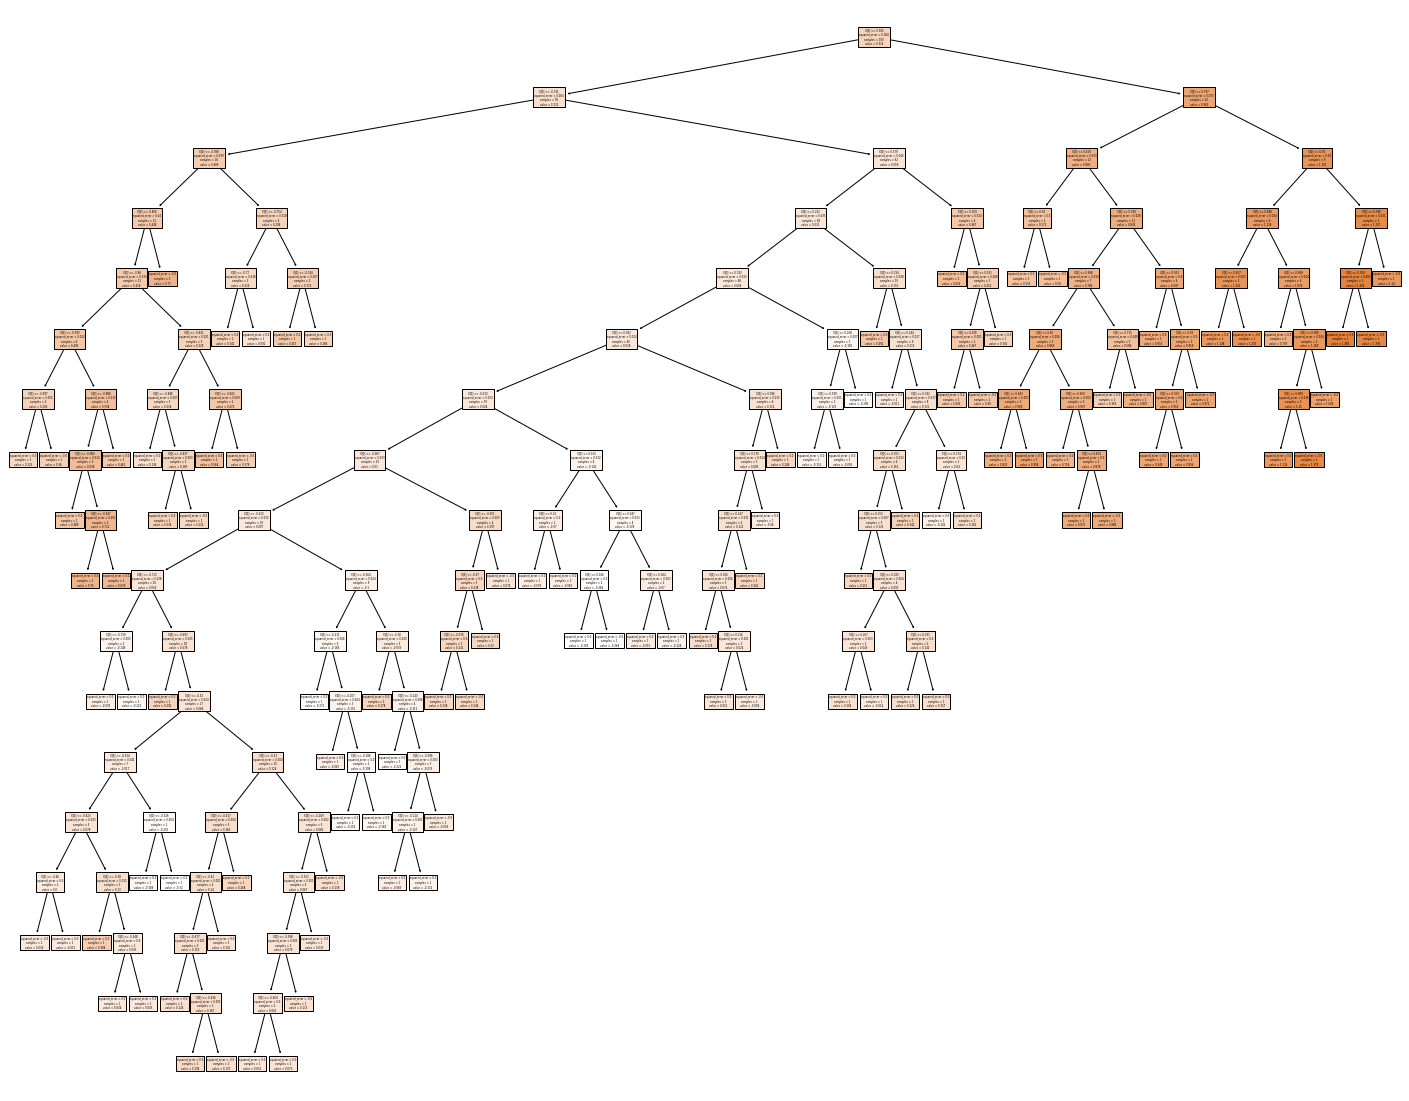

In [54]:
print(export_text(dt_reg))
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_reg, filled=True)

Wygląda na to, że domyślne drzewo regresyjne stworzyło tak dużo węzłów, że model jest mocno przeuczony. Aby temu zapobiec, ograniczymy głębokość drzewa, czyli maksymalną liczbę węzłów od korzenia do liścia włącznie.

In [55]:
dt_reg2 = DecisionTreeRegressor(max_depth = 3)
dt_reg2.fit(x_train, y_train)
preds_dt2 = dt_reg2.predict(x_valid)

In [56]:
wyniki7 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(np.reshape(preds_dt2, (25,1)) - y_valid))
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds_dt2)
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds_dt2)]}, 
                      index=['square_reg', 'dt_reg']).style.background_gradient(cmap='Blues')
wyniki7

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
dt_reg,0.574310,0.853621,0.126859


Ograniczenie głębokości drzewa pomogło i model jest teraz skuteczniejszy niż regresja kwadratowa. Przykładowe hiperparametry, które można regulować/optymalizować to: 

- criterion - kryterium wyboru podziału węzła,
- min_samples_split - minimalna liczba wartości do podzielenia węzła,
- min_samples_leaf - minimalna liczba wartości w liściu drzewa,
- max_depth - maksymalna głębokość drzewa.

|--- feature_0 <= 0.56
|   |--- feature_0 <= -0.74
|   |   |--- feature_0 <= -0.79
|   |   |   |--- value: [0.45]
|   |   |--- feature_0 >  -0.79
|   |   |   |--- value: [0.29]
|   |--- feature_0 >  -0.74
|   |   |--- feature_0 <= 0.38
|   |   |   |--- value: [0.03]
|   |   |--- feature_0 >  0.38
|   |   |   |--- value: [0.47]
|--- feature_0 >  0.56
|   |--- feature_0 <= 0.80
|   |   |--- feature_0 <= 0.62
|   |   |   |--- value: [0.57]
|   |   |--- feature_0 >  0.62
|   |   |   |--- value: [0.84]
|   |--- feature_0 >  0.80
|   |   |--- feature_0 <= 0.91
|   |   |   |--- value: [1.12]
|   |   |--- feature_0 >  0.91
|   |   |   |--- value: [1.34]



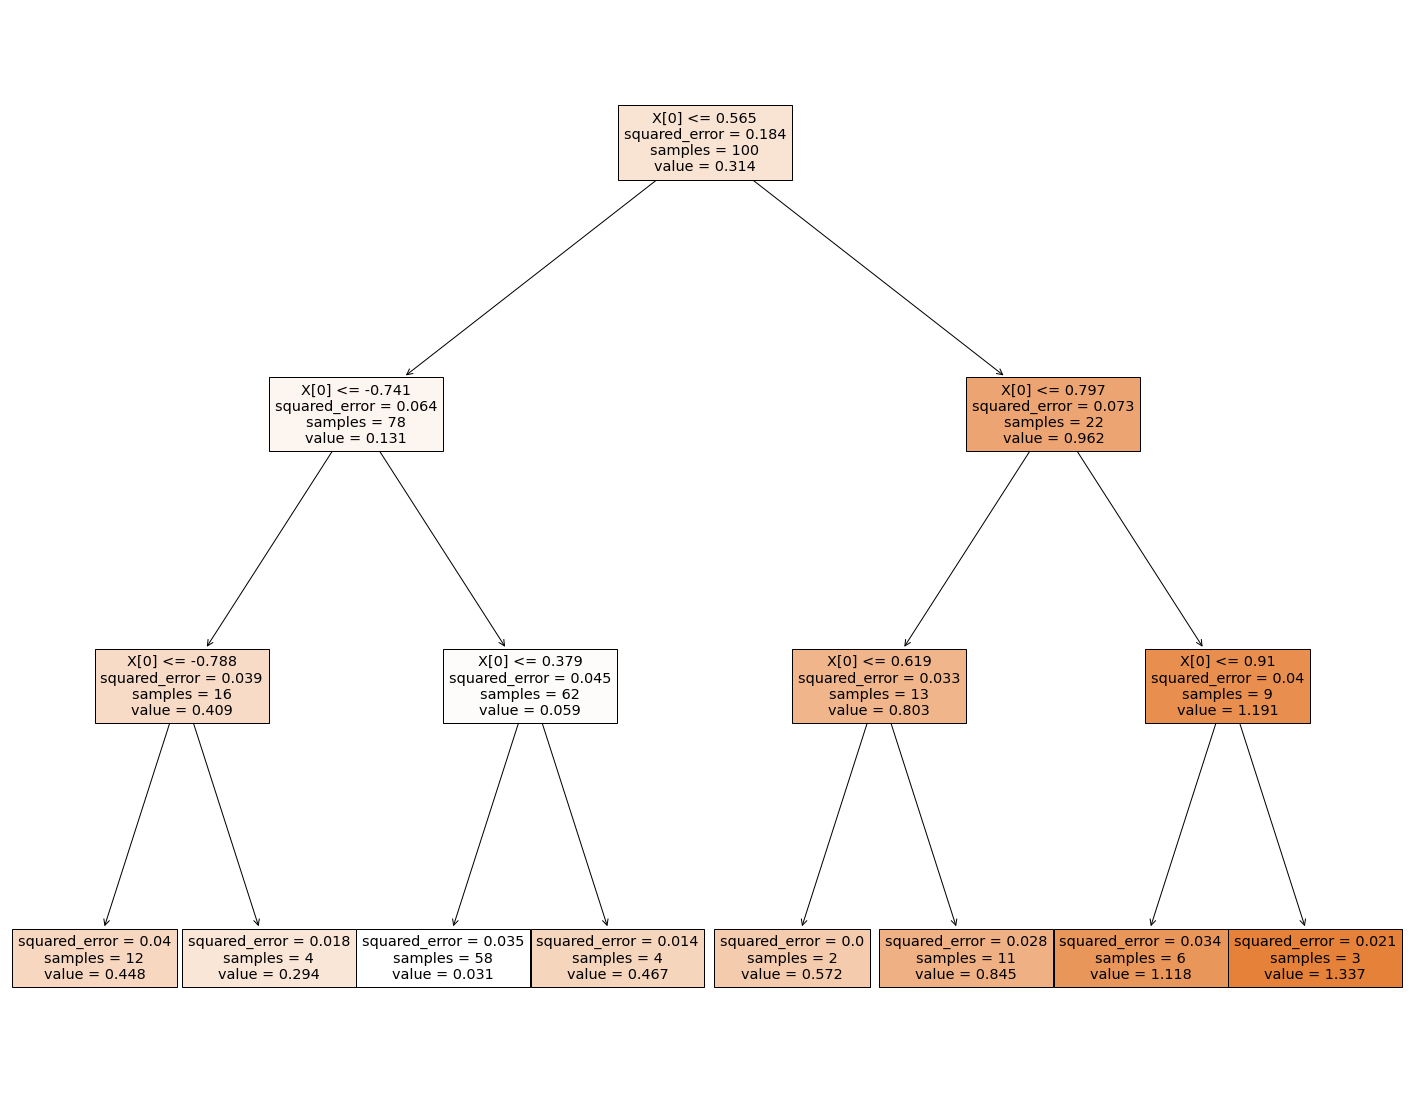

In [57]:
print(export_text(dt_reg2))
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_reg2, filled=True)

Na koniec tej części, warto wspomnieć o paru istotnych informacjach dotyczących drzew decyzyjnych.

1) Drzewa decyzyjne nie wymagają wcześniejszej standaryzacji danych - co więcej, ewentualna standaryzacja nie wpływa na wyniki oraz predykcję.

2) Drzewa decyzyjne mają skłonność do przeuczania się.

3) Pracując z drzewami, należy uważać przy detekcji outlierów - jeśli wykluczymy outliery ze zbioru treningowego, a analogiczne znajdą się w zbiorze testowym lub walidacyjnym, drzewo może takich wartości nie obsłużyć i zwrócić mocno niepoprawne predykcje.

4) W praktyce, drzewa decyzyjne wykorzystuje się głównie jako algorytm pomocniczy w algorytmach ensemble, takich jak na przykład Random Forest, LightGBM czy XGBoost.
***

## Random forest

Jak wspomniano wyżej, lasy losowe, bardziej znane pod nazwą random forest, są algorytmem ensemble, czyli wykorzystującym wiele modeli (algorytmów) jednocześnie. W przypadku lasów są to, jak sama nazwa wskazuje, drzewa decyzyjne. Konkretnie, ten algorytm tworzy $n$ drzew decyzyjnych, a następnie (w regresji) dla ustalonego rekordu ze zbioru testowego/walidacyjnego, zwraca średnią predykcję z tych drzew jako swoją predykcję dla owego rekordu.

**Konstrukcja**

Oczywiście, aby tworzenie wielu drzew decyzyjnych miało w ogóle sens, nie mogą być one identyczne. Taki efekt uzyskuje się łącząc dwie metody związane z losowaniem. Pierwszą z nich jest bagging, czyli bootstrap aggregating. Ten algorytm polega na tworzeniu nowego zbioru danych przez losowanie rekordów ze zbioru treningowego ze zwracaniem. Dzięki temu, każde drzewo z dużym prawdopodobieństwem będzie wytrenowane na innym zbiorze danych. Drugim elementem baggingu jest agregacja, czyli opisane wcześniej uśrednienie predykcji modeli pomocniczych.

Poza losowaniem danych treningowych dla każdego podmodelu, same drzewa również zawierają w sobie element losowości. Mianowicie, optymalny warunek dla każdego węzła jest determinowany jedynie na podstawie losowego podzbioru zmiennych objaśniających. Taka konstrukcja lasów redukuje skłonność podedynczego drzewa do przeuczania się. Nie ma ona jednak wpływu na problem drzew decyzyjnych z outlierami, a także nie zmienia tego, że standaryzacja nie zmienia wyników algorytmu.

**Hiperparametry**

Przykładowe hiperparametry lasów losowych:

- criterion - kryterium wyboru podziału węzła - jak w drzewach decyzyjnych,
- min_samples_split - minimalna liczba wartości do podzielenia węzła - jak w drzewach decyzyjnych,
- min_samples_leaf - minimalna liczba wartości w liściu drzewa - jak w drzewach decyzyjnych,
- max_depth - maksymalna głębokość drzewa - jak w drzewach decyzyjnych,


- max_features - liczba cech do rozpatrzenia w wyborze podziału każdego węzła,
- max_samples - liczba rekordów każdego losowego podzbioru do treningu drzew,
- n_estimators - liczba drzew w lesie.

Teraz zamodelujemy nasze dane lasem losowym.

In [58]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,np.reshape(y_train, (100,)))
rf_preds = rf_reg.predict(x_valid)

In [59]:
wyniki8 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(np.reshape(preds_dt2, (25,1)) - y_valid)),
                                      np.sum(np.square(np.reshape(rf_preds, (25,1)) - y_valid)),
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds_dt2),
                                    metrics.r2_score(y_valid, rf_preds),
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds_dt2),
                                     metrics.mean_absolute_error(y_valid, rf_preds),
                                    ]}, 
                      index=['square_reg', 'dt_reg', 'rf_reg']).style.background_gradient(cmap='Blues')
wyniki8

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
dt_reg,0.574310,0.853621,0.126859
rf_reg,0.982969,0.749462,0.150648


Domyślne wyniki znowu są słabe, więc znowu spróbujemy dostosować hiperparametr max_depth.

In [60]:
rf_reg2 = RandomForestRegressor(max_depth = 3)
rf_reg2.fit(x_train,np.reshape(y_train, (100,)))
rf_preds2 = rf_reg2.predict(x_valid)

In [61]:
wyniki9 = pd.DataFrame(data = {'RSS':[np.sum(np.square(preds4 - y_valid)),
                                      np.sum(np.square(np.reshape(preds_dt2, (25,1)) - y_valid)),
                                      np.sum(np.square(np.reshape(rf_preds2, (25,1)) - y_valid)),
                                    ],
                             'R2': [metrics.r2_score(y_valid, preds4),
                                    metrics.r2_score(y_valid, preds_dt2),
                                    metrics.r2_score(y_valid, rf_preds2),
                                    ],
                             'MAE': [metrics.mean_absolute_error(y_valid, preds4), 
                                     metrics.mean_absolute_error(y_valid, preds_dt2),
                                     metrics.mean_absolute_error(y_valid, rf_preds2),
                                    ]}, 
                      index=['square_reg', 'dt_reg', 'rf_reg']).style.background_gradient(cmap='Blues')
wyniki9

,RSS,R2,MAE
square_reg,0.710297,0.818960,0.131138
dt_reg,0.574310,0.853621,0.126859
rf_reg,0.490039,0.875099,0.111054


W efekcie uzyskaliśmy najlepszy z trzech modeli.
***

## Inne modele

### XGBoost

XGBoost również należy do grupy algorytmów ensemble i także bazuje na drzewach decyzyjnych, jednak działa nieco inaczej niż random forest. Mianowicie, XGBoost na początek generuje wyjściową predykcję (w przypadku regresji jest to z reguły średnia wartość zmiennej objaśnianej z całego zbioru treningowego), następnie tworzy drzewo decyzyjne na resztach z tej predykcji, wyliczając tym samym oczekiwany błąd, zmniejsza ów błąd mnożąc go przez liczbę z przedziału $(0,1)$, i ostatecznie dodaje pomniejszony błąd do predykcji wyjściowej, tworząc nową predykcję. Jest to proces iteracyjny, potwarzany $n$ razy. Opisany tu algorytm nosi nazwę Gradient Boosting, zaś XGBoost jest jego implementacją, która wyróżnia się przede wszystkim metodą konstruowania kolejnych drzew decyzyjnych - poziom po poziomie.

### LightGBM

LightGBM jest bardzo podobnym algorytmem do XGBoost, czyli również korzysta z Gradient Boostingu. Główna różnica między nimi to wymieniony wyżej sposób konstruowania pomocniczych drzew decyzyjnych - tutaj każdy nowy węzeł jest zawsze tym najlepszym w danym momencie, niezależnie od poziomu głębokości drzewa tego węzła. Poza tym te algorytmy nieco inaczej obsługują zmienne kategoryczne. LightGBM jest też dużo lżejszym algorytmem, co zresztą narzuca sama nazwa - jest szybszy w działaniu i wymaga mniej pamięci, a mimo to daje bardzo zbliżone rezultaty - w dokumentacji można nawet przeczytać, że lepsze :)

### Sieci neuronowe

Sieci neuronowe to funkcje ideowo oparte o konstrukcję zwierzęcego mózgu. Składają się one z warstw neuronów, które pobierają liczby, transformują je i przekazują do kolejnych warstw. Pierwszą warstwę nazywa się wejściową, ostatnią wyjściową, zaś wszystkie warstwy pomiędzy nazywa się ukrytymi. Z reguły każdy neuron z warstwy $k$ jest połączony z każdym neuronem z warstwy $k+1$.

![title](nn_construction.png)

Formalnie, sieć neuronową można zdefiniować jako naprzemienne złożenie $n$ funkcji afinicznych i $n$ funkcji zwanych aktywacyjnymi, z których każda, poza ostatnią, nie może być wielomianem. Wzór ogólny sieci, która ma $n-1$ warstw ukrytych, dany jest jako

$$f_\mathcal{N}(\mathbf{x})=\big(\sigma_n\circ W_n\circ ... \circ\sigma_2\circ W_2\circ\sigma_1\circ W_1\big) (\mathbf{x}),$$


gdzie $W_I$ to funkcje afiniczne, czyli postaci $W_i(x)=A_i(x)+B_i$, gdzie $A_i$ to funkcja liniowa, a $B_i$ jest wektorem, zaś $\sigma_i$ to funkcje aktywacyjne. Wartości funkcji afinicznych nazywa się wagami i to one są dopasowywane w procesie uczenia sieci. W regresji ostatnia funkcja aktywacyjna dana jest wzorem $\sigma_n(x)=x$. Fakt, że w warstwach ukrytych funkcje aktywacyjne nie są wielomianami, nadaje sieciom nieliniowość, która jest motorem napędowym ich skuteczności. W szczególności, taka postać tych funkcji sprawia, że sieci neuronowe mają tę samą własność co wielomiany w twierdzeniu Weierstrassa - są gęste w zbiorze funkcji ciągłych. Link do twierdzenia: https://en.wikipedia.org/wiki/Universal_approximation_theorem.

Sieci neuronowe uczą się z wykorzystaniem algorytmów minimalizacji straty, takich jak spadek gradientu, oraz przy użyciu algorytmu propagacji wstecznej - strata jest minimalizowana z warstwy do warstwy, rozpoczynając od ostatniej, czyli wyjściowej.

Taka sieć jest jednak dopiero podstawą dla bardziej zaawansowanych i częściej stosowanych sieci. Do takich zalicza się sieci konwolucyjne (CNN), rekurencyjne (RNN) czy grafowe (GNN). Regresja jest tylko jednym z wielu zastosowań sieci. Warto również wspomnieć, że z reguły sieci neuronowe uczą się tym lepiej, im więcej danych mają do dyspozycji.
***

## Bibliografia

- https://scikit-learn.org/stable/modules/linear_model.html#
- *The Elements of Statistical Learning* Trevor Hastie, Robert Tibshirani, Jerome Friedman. Second Edition. 
- https://en.wikipedia.org/wiki/Polynomial_regression
- https://medium.com/analytics-vidhya/regression-trees-decision-tree-for-regression-machine-learning-e4d7525d8047
- https://xgboost.readthedocs.io/en/stable/
- https://lightgbm.readthedocs.io/en/v3.3.2/